In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

In [7]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, -1) # 'Load it as grayscale'
img2 = img.copy()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)



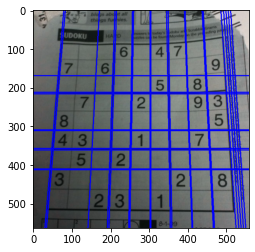

In [8]:
# Hough Transform
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img)
plt.show()

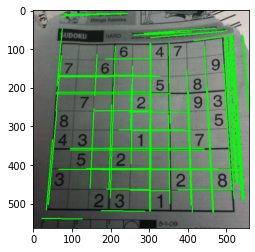

In [9]:
# Probabilistic Hough Transform

lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img2,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img2)
plt.show()